In [1]:
# Importing things 
import numpy as np
import pandas as pd 
import seaborn as sns

import matplotlib.pyplot as plt

import matplotlib.patches as mpatches

import matplotlib.ticker as mticker
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib.ticker import ScalarFormatter

import matplotlib.colors as colors
from matplotlib.colors import ListedColormap
from matplotlib.colors import LogNorm
from matplotlib.colors import Normalize

from scipy.ndimage import gaussian_filter

from matplotlib.gridspec import GridSpec

## Plotting preferences

In [2]:
# Font sizes
axis_label_font = 30
axis_numbers_font = 25
title_font = 50
legend_font = 50

path = '/Users/audreyburggraf/Desktop/THESIS/Figures/'

In [3]:
detection_colours = sns.color_palette("hls", 4)
detection_colours

[(0.86, 0.3712, 0.33999999999999997),
 (0.5688000000000001, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.6311999999999998, 0.33999999999999997, 0.86)]

In [4]:
dark_colours = sns.color_palette("viridis", 8)
dark_colours

[(0.281412, 0.155834, 0.469201),
 (0.244972, 0.287675, 0.53726),
 (0.190631, 0.407061, 0.556089),
 (0.147607, 0.511733, 0.557049),
 (0.119699, 0.61849, 0.536347),
 (0.20803, 0.718701, 0.472873),
 (0.430983, 0.808473, 0.346476),
 (0.709898, 0.868751, 0.169257)]

In [5]:
my_colours = sns.color_palette("husl", 8)
my_colours

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8087954113106306, 0.5634700050056693, 0.19502642696727285),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.19783576093349015, 0.6955516966063037, 0.3995301037444499),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.22335772267769388, 0.6565792317435265, 0.8171355503265633),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.9603888539940703, 0.3814317878772117, 0.8683117650835491)]

In [6]:
cmap_reds = ListedColormap(plt.cm.get_cmap('Reds', 10)(np.arange(10)))
cmap_greens = ListedColormap(plt.cm.get_cmap('Greens', 10)(np.arange(10)))
cmap_purples = ListedColormap(plt.cm.get_cmap('Purples', 10)(np.arange(10)))

In [7]:
alpha = 0.7

## Data 

In [8]:
# Importing data file 
df = pd.read_csv('/Users/audreyburggraf/Desktop/THESIS/Data Files/bigrun_10000_after_changes.csv')
df

Inj.0P alpha0  Inj.0P delta0  Inj.0P pmra  Inj.0P pmdec  Inj.0P prlx  \
0        288.503923     -68.088209   -44.551743    -37.022875    10.061523   
1        138.039973      -3.377097  -163.019718    -32.490641    11.956663   
2        286.695890      -0.244781    -3.752077     -4.259140    10.096390   
3        115.135052       0.740534    26.853094    -84.685793    10.182806   
4        262.038776     -14.041731     3.605326   -100.931148    17.001777   
...             ...            ...          ...           ...          ...   
9995     282.780442      12.718451     8.229683    -11.514563    11.754215   
9996      24.961276      20.537176    47.458743    -84.013850    16.444935   
9997     174.263014      -4.139514    20.895641    -87.415298    12.324102   
9998     288.104504     -29.673692     5.719830   -123.392905    11.458365   
9999     308.556030      31.070632   167.354060    -24.717448    18.785055   

      Inj.1P alpha0  Inj.1P delta0  Inj.1P pmra  Inj.1P pmdec  Inj.1P prlx  \
0        288.503923     -68.088209   -44.551743    -37.022875    10.061523   
1        138.039973      -3.377097  -163.019718    -32.490641    11.956663   
2        286.695890      -0.244781    -3.752077     -4.259140    10.096390   
3        115.135052       0.740534    26.853094    -84.685793    10.182806   
4        262.038776     -14.041731     3.605326   -100.931148    17.001777   
...             ...            ...          ...           ...          ...   
9995     282.780442      12.718451     8.229683    -11.514563    11.754215   
9996      24.961276      20.537176    47.458743    -84.013850    16.444935   
9997     174.263014      -4.139514    20.895641    -87.415298    12.324102   
9998     288.104504     -29.673692     5.719830   -123.392905    11.458365   
9999     308.556030      31.070632   167.354060    -24.717448    18.785055   

      ...  Condition 4  Detection  Astrometric Signature  Stellar Mass  \
0     ...            0          0              56.262094      0.154116   
1     ...            0          0               1.022224      0.302706   
2     ...            0          0              18.653842      0.078149   
3     ...            0          0              36.973503      0.386243   
4     ...            0          0               0.974203      0.440679   
...   ...          ...        ...                    ...           ...   
9995  ...            0          0             223.892367      0.073716   
9996  ...            0          0              17.471990      0.519612   
9997  ...            0          0               9.774783      0.175999   
9998  ...            0          0               7.164172      0.263144   
9999  ...            0          0               4.875529      0.170601   

      Scaling Factor   Distance  Semi-Major Axis   Sigma fov       Noise  \
0           1.272583  99.388534         1.136793  333.149854  471.145042   
1          10.244061  83.635376         0.088245   96.705137  136.761717   
2          21.004269  99.045303         0.021571  427.687033  604.840802   
3           3.250046  98.204759         0.442331   91.103628  128.839986   
4          16.434061  58.817380         0.053255   42.230649   59.723156   
...              ...        ...              ...         ...         ...   
9995        1.132350  85.075868         1.038787  642.528879  908.673054   
9996        3.435857  60.808996         0.453412   38.329614   54.206261   
9997       18.785303  81.141817         0.032814  167.592378  237.011414   
9998       11.641484  87.272488         0.071018  113.439746  160.428028   
9999        6.574152  53.233806         0.131680  119.880995  169.537330   

           S/N  
0     0.151966  
1     0.076569  
2     0.647791  
3     0.932673  
4     0.268072  
...        ...  
9995  0.279005  
9996  1.107460  
9997  0.774740  
9998  0.519869  
9999  0.189058  

[10000 rows x 52 columns]

In [9]:
df.columns

Index(['Inj.0P alpha0', 'Inj.0P delta0', 'Inj.0P pmra', 'Inj.0P pmdec',
       'Inj.0P prlx', 'Inj.1P alpha0', 'Inj.1P delta0', 'Inj.1P pmra',
       'Inj.1P pmdec', 'Inj.1P prlx', 'Inj.1P e', 'Inj.1P omega',
       'Inj.1P Omega', 'Inj.1P cosi', 'Inj.1P log(m_p)', 'Inj.1P log(P)',
       'Inj.1P tp', 'Rec.0P alpha0', 'Rec.0P delta0', 'Rec.0P pmra',
       'Rec.0P pmdec', 'Rec0P prlx', 'Rec.1P alpha0', 'Rec.1P delta0',
       'Rec.1P pmra', 'Rec.1P pmdec', 'Rec.1P prlx', 'Rec.1P e',
       'Rec.1P omega', 'Rec.1P Omega', 'Rec.1P cosi', 'Rec.1P log(m_p)',
       'Rec.1P log(P)', 'Rec.1P tp', 'np_chi_sq', 'wp_chi_sq', 'npBIC',
       'wpBIC', 'DeltaBIC', 'Condition 1', 'Condition 2', 'Condition 3',
       'Condition 4', 'Detection', 'Astrometric Signature', 'Stellar Mass',
       'Scaling Factor', 'Distance', 'Semi-Major Axis', 'Sigma fov', 'Noise',
       'S/N'],
      dtype='object')

## Planetary Mass and Orbital Period 

##### Bins
- Mass bins are in units of $M_J$
- Period bins are in units of years
- The bins are evenly spaced in logspace

In [10]:
# Setting the mass and period bins 
Mbins = np.logspace(np.log10(0.3), np.log10(13), 20) 
Pbins = np.logspace(-2, 1, 20) 

# Number of bins 
num_Pbins = len(Pbins) - 1
num_Mbins = len(Mbins) - 1

# Midpoints of the bins 
Mbin_midpoints = (Mbins[:-1] + Mbins[1:]) / 2
Pbin_midpoints = (Pbins[:-1] + Pbins[1:]) / 2

In [11]:
# Data in non-log units
inj_mass_data   = 10**df['Inj.1P log(m_p)'] # [M_J]
inj_period_data = 10**df['Inj.1P log(P)'] # [years]

rec_mass_data   = 10**df['Rec.1P log(m_p)'] # [M_J]
rec_period_data = 10**df['Rec.1P log(P)'] # [years]

In [12]:
detection_data = df['Detection']

In [13]:
# Sample data
conditions = ['Condition 1', 'Condition 2', 'Condition 3', 'Condition 4', 'Detection']

pass_c1 = np.sum(df['Condition 1'])
pass_c2 = np.sum(df['Condition 2'])
pass_c3 = np.sum(df['Condition 3'])
pass_c4 = np.sum(df['Condition 4'])  
pass_det = np.sum(df['Detection'])

fail_c1 = len(df['Condition 1']) - pass_c1
fail_c2 = len(df['Condition 2']) - pass_c2
fail_c3 = len(df['Condition 3']) - pass_c3
fail_c4 = len(df['Condition 4']) - pass_c4
fail_det = len(df['Detection'])  - pass_det

pass_counts = [pass_c1, pass_c2, pass_c3, pass_c4, pass_det]  # Number of signals passing each condition
fail_counts = [fail_c1, fail_c2, fail_c3, fail_c4, fail_det]  # Number of signals failing each condition

# Calculate total counts (pass + fail) for each condition
total_counts = np.array(pass_counts) + np.array(fail_counts)

In [14]:
print('The total number of systems are:', len(df['Condition 1']))
print(' ')
print('Condition 1')
print('Pass Count:', pass_c1)
print('Pass %:', pass_c1/ 10000)
print('Fail Count:', fail_c1)
print('Fail %:', fail_c1/ 10000)
print(' ')
print('Condition 2')
print('Pass Count:', pass_c2)
print('Pass %:', pass_c2/ 10000)
print('Fail Count:', fail_c2)
print('Fail %:', fail_c2/ 10000)
print(' ')
print('Condition 3')
print('Pass Count:', pass_c3)
print('Pass %:', pass_c3/ 10000)
print('Fail Count:', fail_c3)
print('Fail %:', fail_c3/ 10000)
print(' ')
print('Condition 4')
print('Pass Count:', pass_c4)
print('Pass %:',pass_c4/ 10000 )
print('Fail Count:', fail_c4)
print('Fail %:', fail_c4/ 10000)
print(' ')
print('Detection')
print('Pass Count:', pass_det)
print('Pass %:', pass_det/ 10000)
print('Fail Count:', fail_det)
print('Fail %:', fail_det/ 10000)

The total number of systems are: 10000
 
Condition 1
Pass Count: 5948
Pass %: 0.5948
Fail Count: 4052
Fail %: 0.4052
 
Condition 2
Pass Count: 9093
Pass %: 0.9093
Fail Count: 907
Fail %: 0.0907
 
Condition 3
Pass Count: 4380
Pass %: 0.438
Fail Count: 5620
Fail %: 0.562
 
Condition 4
Pass Count: 2205
Pass %: 0.2205
Fail Count: 7795
Fail %: 0.7795
 
Detection
Pass Count: 1536
Pass %: 0.1536
Fail Count: 8464
Fail %: 0.8464


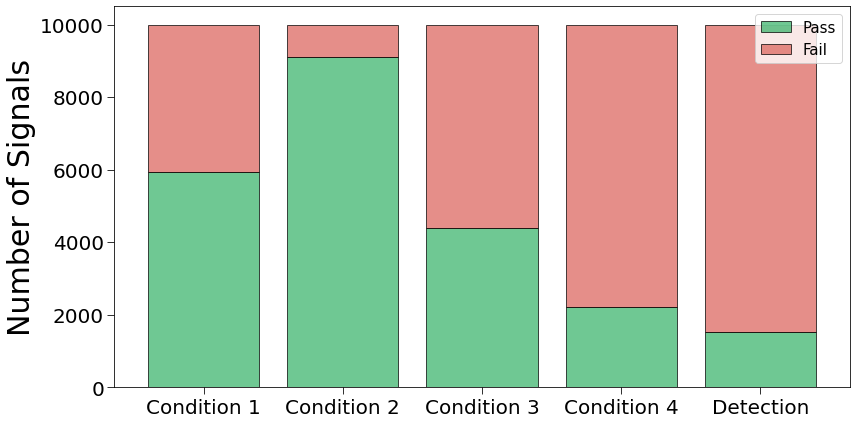

In [15]:
# Plotting
fig, ax = plt.subplots(figsize=(12, 6)) 

# Stacked bar plot
ax.bar(conditions, 
        pass_counts, 
        color=my_colours[3],
        edgecolor='black',
        alpha = alpha,
        label='Pass')

ax.bar(conditions, 
        fail_counts, 
        bottom=pass_counts, 
        color=detection_colours[0], 
        edgecolor='black',
        alpha = alpha,
        label='Fail')


#ax.set_xlabel('Conditions',fontsize = paper_axis_label_fs)
ax.set_ylabel('Number of Signals', fontsize = axis_label_font)

# plt.title('Pass/Fail Ratio for Each Condition', fontsize=paper_title_fs)

ax.tick_params(labelsize=20, which='major', length=7)
ax.tick_params(which='minor', length=4)
        

plt.legend(fontsize = 15)

plt.tight_layout()

# plt.savefig(path + 'DetectionConditionPlot.pdf')

## Making detection data 

In [16]:
# Making arrays we will fill in the for loop 
num_planets_per_bin   = np.zeros((num_Pbins, num_Mbins))
num_detected          = np.zeros((num_Pbins, num_Mbins))
sensitivity           = np.zeros((num_Pbins, num_Mbins))
detection_uncertainty = np.zeros((num_Pbins, num_Mbins))

num_condition_1 = np.zeros((num_Pbins, num_Mbins))
num_condition_2 = np.zeros((num_Pbins, num_Mbins))
num_condition_3 = np.zeros((num_Pbins, num_Mbins))
num_condition_4 = np.zeros((num_Pbins, num_Mbins))

In [17]:
# Iterate through each period bin
for i, p in enumerate(Pbins[:-1]):
    # Iterate through each mass bin
    for j, m in enumerate(Mbins[:-1]):
        
        # Mask to determine if data falls within the current period-mass bin
        mask = (inj_mass_data >= Mbins[j]) & (inj_mass_data < Mbins[j+1]) & (inj_period_data >= Pbins[i]) & (inj_period_data < Pbins[i+1])
        
        # Determine the number of detected planets in the current bin
        detected = mask & (detection_data == 1)
        condition_1 = mask & (df['Condition 1'] == 1)
        condition_2 = mask & (df['Condition 2'] == 1)
        condition_3 = mask & (df['Condition 3'] == 1)
        condition_4 = mask & (df['Condition 4'] == 1)
        
        # Find the number of planets/data points in the current bin
        num_planets_per_bin[i, j] = mask.sum()
        
        # Find the number of detected planets in the current bin
        num_detected[i, j] = detected.sum()
        num_condition_1[i,j] = condition_1.sum()
        num_condition_2[i,j] = condition_2.sum()
        num_condition_3[i,j] = condition_3.sum()
        num_condition_4[i,j] = condition_4.sum()

        
sensitivity = num_detected / num_planets_per_bin
detection_uncertainty = np.sqrt(num_detected) / num_planets_per_bin
pass_fraction_condition_1 = num_condition_1/ num_planets_per_bin
pass_fraction_condition_2 = num_condition_2/ num_planets_per_bin
pass_fraction_condition_3 = num_condition_3/ num_planets_per_bin
pass_fraction_condition_4 = num_condition_4/ num_planets_per_bin

In [18]:
print('Minimum uncertainty: ', detection_uncertainty.min())
print('Maximum uncertainty: ', detection_uncertainty.max())

Minimum uncertainty:  0.0
Maximum uncertainty:  0.2037706832433973


In [19]:
# Empty cells occur where the sensitivity was set to -1
empty_cells = np.where(sensitivity == -1, -1, np.nan)

# Find and print the number of empty cells
num_empty_cells = np.sum(empty_cells == -1)
print('There are', num_empty_cells, 'empty cells')

There are 0 empty cells


# Plot: Period, mass, detection %
- x-axis: Period (years)
- y-axis: Mass ($M_J$)
- Axes should both be log 
- plot with plt.pcolormesh(period, mass, sensitivity.T)
- set to negative - set colour 

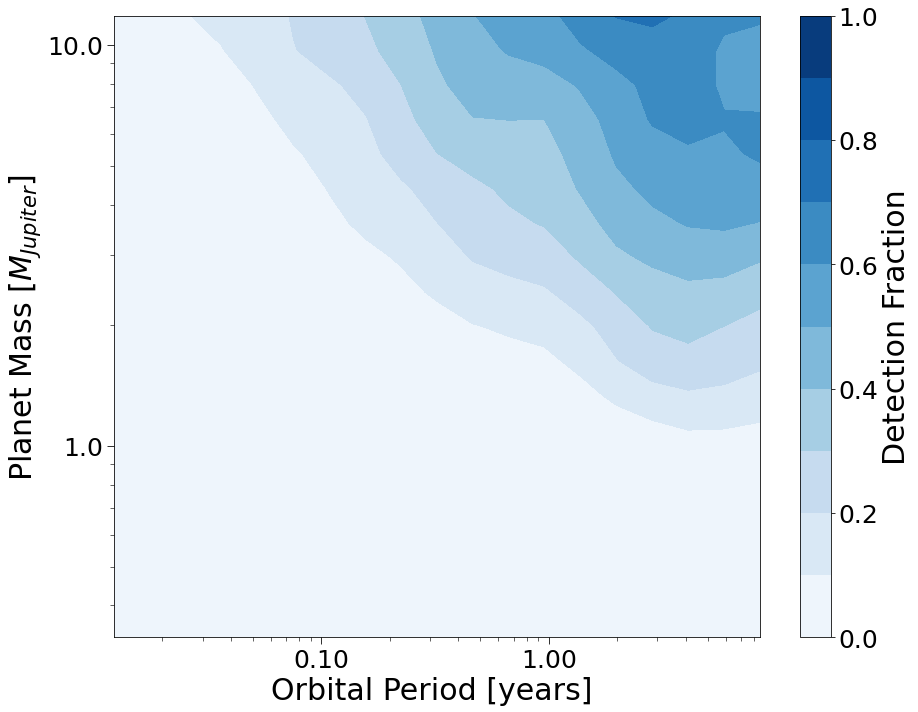

In [20]:
levels = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

cbar_ticks = [0, 0.2,0.4, 0.6, 0.8, 1]

# Plotting the heatmap
fig, ax = plt.subplots(figsize=(13, 10))

im = ax.contourf(Pbin_midpoints, # period 
                 Mbin_midpoints, # mass 
                 gaussian_filter(sensitivity.T, 1),
                 cmap='Blues',
                 levels=levels, #10,
                 vmin=0,
                 vmax=1)


# Color bar
cbar = plt.colorbar(im, ticks=cbar_ticks, orientation='vertical')
cbar.set_label('Detection Fraction', fontsize=axis_label_font)
cbar.ax.tick_params(labelsize=axis_numbers_font)

# Axes labels 
ax.set_xlabel('Orbital Period [years] ', fontsize=axis_label_font)
ax.set_ylabel('Planet Mass [$M_{Jupiter}$]', fontsize=axis_label_font)

# Adding ticks to axes
ax.tick_params(labelsize=axis_numbers_font, which='major', length=7)
ax.tick_params(which='minor', length=4)


# Set log scale for both axes
ax.set_xscale('log')
ax.set_yscale('log')


# Making axes labels not scientific notation
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# Adjust layout
plt.tight_layout()

# plt.savefig(path + 'SensitivitySmooth.pdf', dpi= 300)

In [21]:
# # Plotting the heatmap
# fig, ax = plt.subplots(figsize=(13, 10))
         

# im = ax.pcolormesh(Pbins,
#                    Mbins,
#                    sensitivity.T,
#                    cmap='Blues',
#                    vmin=0,
#                    vmax=1)


# # Color bar
# cbar = plt.colorbar(im, format=mticker.FuncFormatter(lambda y, _: '{:g}'.format(y)), orientation='vertical')
# cbar.set_label('Detection Fraction', fontsize=axis_label_font)
# cbar.ax.tick_params(labelsize=axis_numbers_font)

# # Axes labels 
# ax.set_xlabel('Orbital Period [years] ', fontsize=axis_label_font)
# ax.set_ylabel('Planet Mass [$M_{Jupiter}$]', fontsize=axis_label_font)

# # Adding ticks to axes
# ax.tick_params(labelsize=axis_numbers_font, which='major', length=7)
# ax.tick_params(which='minor', length=4)


# # Set log scale for both axes
# ax.set_xscale('log')
# ax.set_yscale('log')


# # Making axes labels not scientific notation
# ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
# ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# # Adjust layout
# plt.tight_layout()

Text(0.03, 0.93, '(e)')

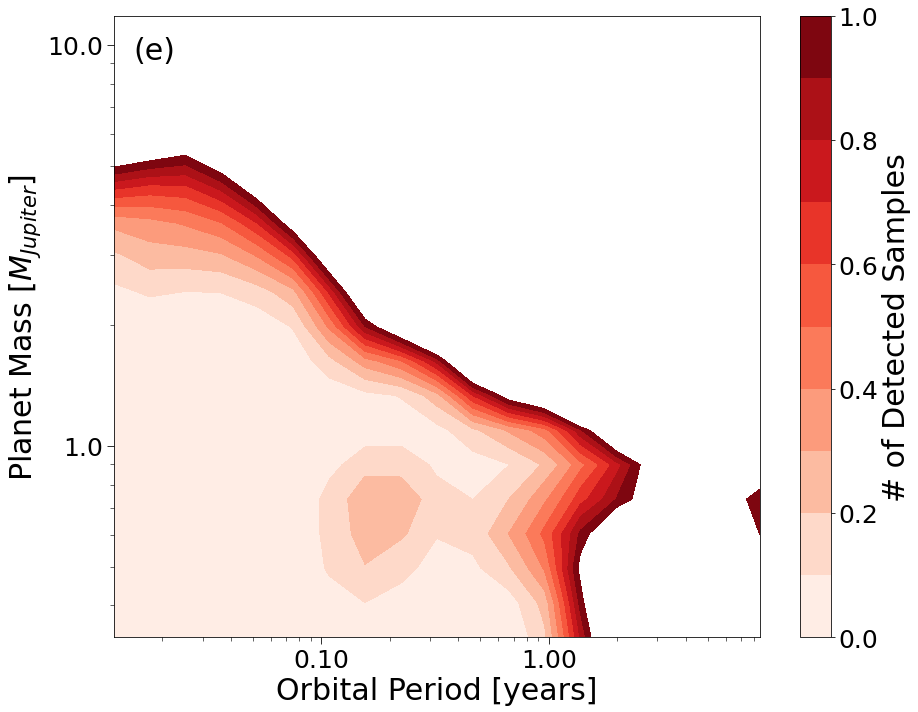

In [22]:
# Plotting the heatmap
fig, ax = plt.subplots(figsize=(13, 10))

im = ax.contourf(Pbin_midpoints, # period 
                 Mbin_midpoints, # mass 
                 gaussian_filter(num_detected.T, 1),
                 cmap='Reds',
                 levels=levels)

# # Plotting main heatmap
# im = ax.pcolormesh(Pbins,
#                    Mbins,
#                    num_detected.T,
#                    # cmap = 'Reds', 
#                    cmap=cmap_reds,
#                    vmin=num_detected.min(),
#                    vmax=num_detected.max())

# Color bar setup
cbar = plt.colorbar(im, ticks=cbar_ticks, orientation='vertical')
cbar.set_label('# of Detected Samples', fontsize=axis_label_font)
cbar.ax.tick_params(labelsize=axis_numbers_font)


# Axes labels
ax.set_xlabel('Orbital Period [years]', fontsize=axis_label_font)
ax.set_ylabel('Planet Mass [$M_{Jupiter}$]', fontsize=axis_label_font)

# Adding ticks to axes
ax.tick_params(labelsize=axis_numbers_font, which='major', length=7)
ax.tick_params(which='minor', length=4)

# Set log scale for both axes
ax.set_xscale('log')
ax.set_yscale('log')

# Formatting axes labels to avoid scientific notation
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# Adjust layout
plt.tight_layout()


ax.text(0.03, 0.93, '(e)', transform=ax.transAxes, fontsize=axis_label_font)

# plt.savefig(path + 'DetectionPlot.pdf', dpi= 300)

In [23]:
print('min = ' ,num_detected.min())
print('max = ' ,num_detected.max())
print('Mean:', np.mean(num_detected))

min =  0.0
max =  30.0
Mean: 4.254847645429363


# Conditions Plot

In [24]:
conditions_levels = np.linspace(0, 1, num=15)
conditions_levels

array([0.        , 0.07142857, 0.14285714, 0.21428571, 0.28571429,
       0.35714286, 0.42857143, 0.5       , 0.57142857, 0.64285714,
       0.71428571, 0.78571429, 0.85714286, 0.92857143, 1.        ])

Text(0.03, 0.93, '(a)')

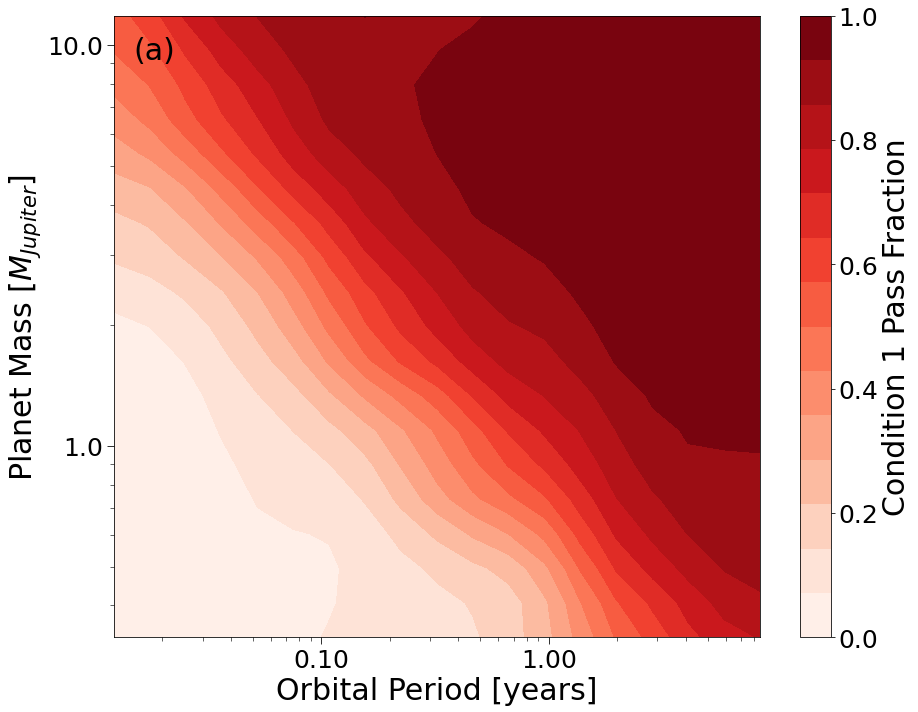

In [25]:


# Plotting the heatmap
fig, ax = plt.subplots(figsize=(13, 10))

im = ax.contourf(Pbin_midpoints, # period 
                 Mbin_midpoints, # mass 
                 gaussian_filter(pass_fraction_condition_1.T, 1),
                 cmap='Reds',
                 levels=conditions_levels)


# Plotting main heatmap
# im = ax.pcolormesh(Pbins,
#                    Mbins,
#                    num_condition_1.T,
#                    # cmap = 'Reds', 
#                    cmap=cmap_reds,
#                    vmin=num_condition_1.min(),
#                    vmax=num_condition_1.max())

# Color bar setup
cbar = plt.colorbar(im, ticks=cbar_ticks, orientation='vertical')
cbar.set_label('Condition 1 Pass Fraction', fontsize=axis_label_font)
cbar.ax.tick_params(labelsize=axis_numbers_font)


# Axes labels
ax.set_xlabel('Orbital Period [years]', fontsize=axis_label_font)
ax.set_ylabel('Planet Mass [$M_{Jupiter}$]', fontsize=axis_label_font)

# Adding ticks to axes
ax.tick_params(labelsize=axis_numbers_font, which='major', length=7)
ax.tick_params(which='minor', length=4)

# Set log scale for both axes
ax.set_xscale('log')
ax.set_yscale('log')

# Formatting axes labels to avoid scientific notation
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# Adjust layout
plt.tight_layout()

ax.text(0.03, 0.93, '(a)', transform=ax.transAxes, fontsize=axis_label_font)

# plt.savefig(path + 'Condition1Map.pdf', dpi= 300)

Text(0.03, 0.93, '(b)')

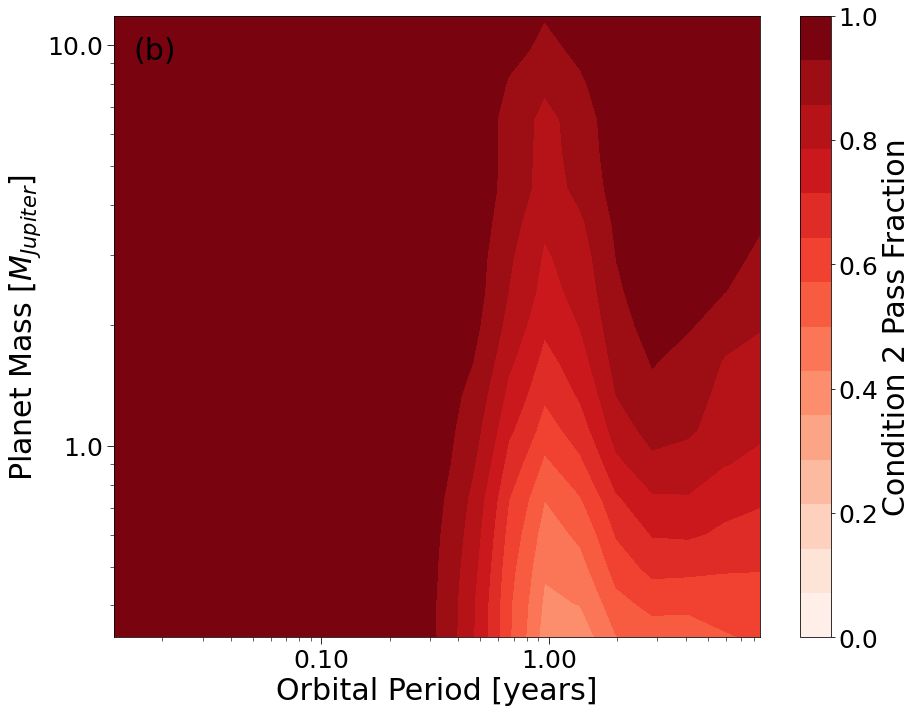

In [26]:
# Plotting the heatmap
fig, ax = plt.subplots(figsize=(13, 10))

im = ax.contourf(Pbin_midpoints, # period 
                 Mbin_midpoints, # mass 
                 gaussian_filter(pass_fraction_condition_2.T, 1),
                 cmap='Reds',
                 levels=conditions_levels)#15,

# Plotting main heatmap
# im = ax.pcolormesh(Pbins,
#                    Mbins,
#                    num_condition_2.T,
#                    # cmap = 'Reds', 
#                    cmap=cmap_reds,
#                    vmin=num_detected.min(),
#                    vmax=num_detected.max())

# Color bar setup
cbar = plt.colorbar(im, ticks=cbar_ticks, orientation='vertical')
cbar.set_label('Condition 2 Pass Fraction', fontsize=axis_label_font)
cbar.ax.tick_params(labelsize=axis_numbers_font)


# Axes labels
ax.set_xlabel('Orbital Period [years]', fontsize=axis_label_font)
ax.set_ylabel('Planet Mass [$M_{Jupiter}$]', fontsize=axis_label_font)

# Adding ticks to axes
ax.tick_params(labelsize=axis_numbers_font, which='major', length=7)
ax.tick_params(which='minor', length=4)

# Set log scale for both axes
ax.set_xscale('log')
ax.set_yscale('log')

# Formatting axes labels to avoid scientific notation
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# Adjust layout
plt.tight_layout()

ax.text(0.03, 0.93, '(b)', transform=ax.transAxes, fontsize=axis_label_font)

# plt.savefig(path + 'Condition2Map.pdf', dpi= 300)

Text(0.03, 0.93, '(c)')

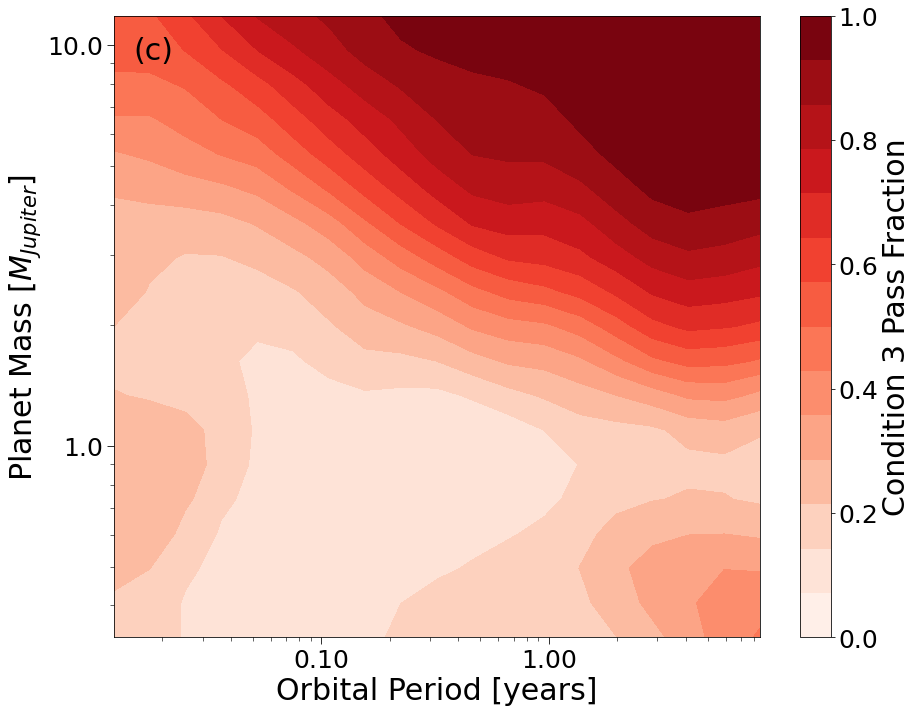

In [27]:
# Plotting the heatmap
fig, ax = plt.subplots(figsize=(13, 10))

im = ax.contourf(Pbin_midpoints, # period 
                 Mbin_midpoints, # mass 
                 gaussian_filter(pass_fraction_condition_3.T, 1),
                 cmap='Reds',
                 levels=conditions_levels,)

# Plotting main heatmap
# im = ax.pcolormesh(Pbins,
#                    Mbins,
#                    num_condition_3.T,
#                    # cmap = 'Reds', 
#                    cmap=cmap_reds,
#                    vmin=num_detected.min(),
#                    vmax=num_detected.max())

# Color bar setup
cbar = plt.colorbar(im, ticks=cbar_ticks, orientation='vertical')
cbar.set_label('Condition 3 Pass Fraction', fontsize=axis_label_font)
cbar.ax.tick_params(labelsize=axis_numbers_font)


# Axes labels
ax.set_xlabel('Orbital Period [years]', fontsize=axis_label_font)
ax.set_ylabel('Planet Mass [$M_{Jupiter}$]', fontsize=axis_label_font)

# Adding ticks to axes
ax.tick_params(labelsize=axis_numbers_font, which='major', length=7)
ax.tick_params(which='minor', length=4)

# Set log scale for both axes
ax.set_xscale('log')
ax.set_yscale('log')

# Formatting axes labels to avoid scientific notation
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# Adjust layout
plt.tight_layout()


ax.text(0.03, 0.93, '(c)', transform=ax.transAxes, fontsize=axis_label_font)

# plt.savefig(path + 'Condition3Map.pdf', dpi= 300)

Text(0.03, 0.93, '(d)')

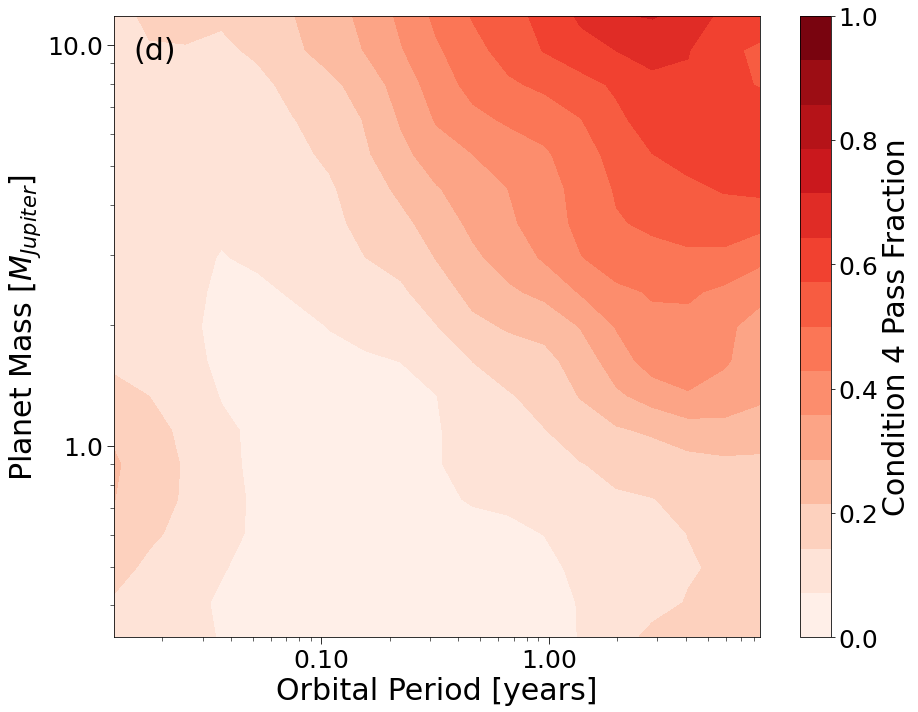

In [28]:
# Plotting the heatmap
fig, ax = plt.subplots(figsize=(13, 10))

im = ax.contourf(Pbin_midpoints, # period 
                 Mbin_midpoints, # mass 
                 gaussian_filter(pass_fraction_condition_4.T, 1),
                 cmap='Reds',
                 levels=conditions_levels,)

# Plotting main heatmap
# im = ax.pcolormesh(Pbins,
#                    Mbins,
#                    num_condition_4.T,
#                    # cmap = 'Reds', 
#                    cmap=cmap_reds,
#                    vmin=num_detected.min(),
#                    vmax=num_detected.max())

# Color bar setup
cbar = plt.colorbar(im, ticks=cbar_ticks, orientation='vertical')
cbar.set_label('Condition 4 Pass Fraction', fontsize=axis_label_font)
cbar.ax.tick_params(labelsize=axis_numbers_font)


# Axes labels
ax.set_xlabel('Orbital Period [years]', fontsize=axis_label_font)
ax.set_ylabel('Planet Mass [$M_{Jupiter}$]', fontsize=axis_label_font)

# Adding ticks to axes
ax.tick_params(labelsize=axis_numbers_font, which='major', length=7)
ax.tick_params(which='minor', length=4)

# Set log scale for both axes
ax.set_xscale('log')
ax.set_yscale('log')

# Formatting axes labels to avoid scientific notation
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# Adjust layout
plt.tight_layout()


ax.text(0.03, 0.93, '(d)', transform=ax.transAxes, fontsize=axis_label_font, color='black')

# plt.savefig(path + 'Condition4Map.pdf', dpi= 300)

# Investigating pass rates and orbital period

In [29]:
# Making arrays we will fill in the for loop 
num_planets_per_P_bin        = np.zeros(num_Pbins)
num_detected_Pbin          = np.zeros(num_Pbins)
sensitivity_Pbins           = np.zeros(num_Pbins)
detection_uncertainty_Pbins = np.zeros(num_Pbins)

num_condition_1_Pbins = np.zeros(num_Pbins)
num_condition_2_Pbins = np.zeros(num_Pbins)
num_condition_3_Pbins = np.zeros(num_Pbins)
num_condition_4_Pbins = np.zeros(num_Pbins)

In [30]:
# Iterate through each period bin
for i, p in enumerate(Pbins[:-1]):
        
    # Mask to determine if data falls within the current period-mass bin
    mask = (inj_period_data >= Pbins[i]) & (inj_period_data < Pbins[i+1])

    # Determine the number of detected planets in the current bin
    detected = mask & (df['Detection'] == 1)
    condition_1 = mask & (df['Condition 1'] == 1)
    condition_2 = mask & (df['Condition 2'] == 1)
    condition_3 = mask & (df['Condition 3'] == 1)
    condition_4 = mask & (df['Condition 4'] == 1)

    # Find the number of planets/data points in the current bin
    num_planets_per_P_bin[i] = mask.sum()

    # Find the number of detected planets in the current bin
    num_detected_Pbins[i] = detected.sum()
    num_condition_1_Pbins[i] = condition_1.sum()
    num_condition_2_Pbins[i] = condition_2.sum()
    num_condition_3_Pbins[i] = condition_3.sum()
    num_condition_4_Pbins[i] = condition_4.sum()

        
sensitivity_Pbins = num_detected_Pbins / num_planets_per_P_bin
detection_uncertainty_Pbins = np.sqrt(num_detected_Pbin) / num_planets_per_P_bin
pass_fraction_condition_1_Pbins = num_condition_1_Pbins/ num_planets_per_P_bin
pass_fraction_condition_2_Pbins = num_condition_2_Pbins/ num_planets_per_P_bin
pass_fraction_condition_3_Pbins = num_condition_3_Pbins/ num_planets_per_P_bin
pass_fraction_condition_4_Pbins = num_condition_4_Pbins/ num_planets_per_P_bin

NameError: name 'num_detected_Pbins' is not defined

NameError: name 'pass_fraction_condition_1_Pbins' is not defined

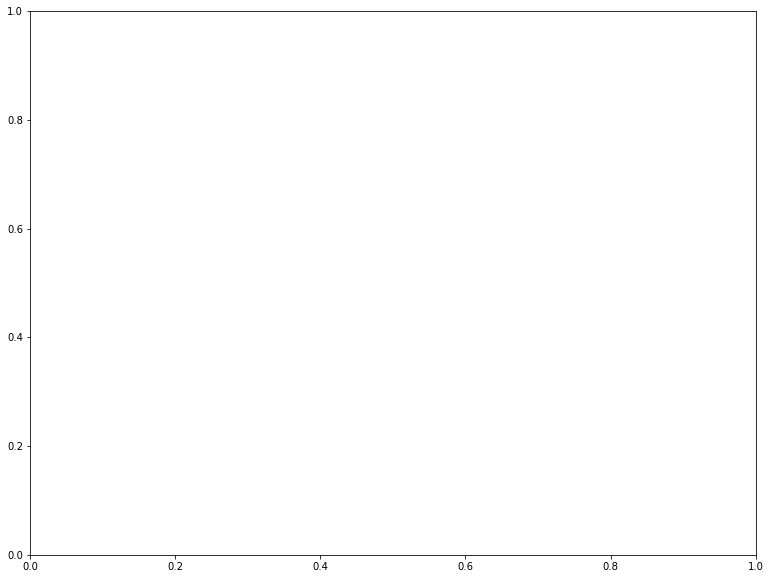

In [31]:
# Create a figure
fig, ax = plt.subplots(figsize=(13, 10))


plt.bar(Pbins[:-1],
        pass_fraction_condition_1_Pbins,
        width=np.diff(Pbins),
        color=my_colours[0], 
        alpha=alpha, 
        edgecolor='black',
        align="edge")

# Axes labels 
plt.xlabel('Orbital Period [years]', fontsize=axis_label_font)
plt.ylabel('Condition 1 Pass Fraction', fontsize=axis_label_font)

# Set x-axis to log scale
plt.xscale('log')

# Formatting axes labels to avoid scientific notation
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# Set x-axis tick parameters
plt.tick_params(labelsize=axis_numbers_font, which='major', length=7)
plt.tick_params(which='minor', length=4)


NameError: name 'pass_fraction_condition_2_Pbins' is not defined

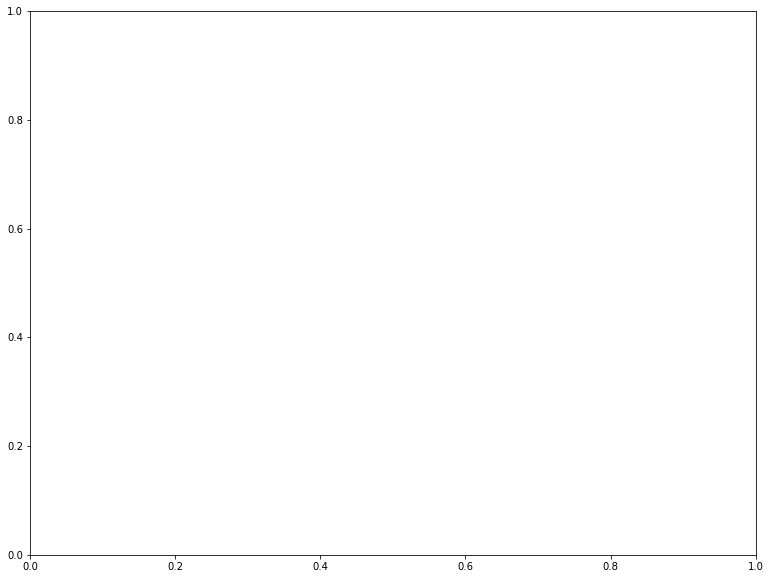

In [32]:
# Create a figure
fig, ax = plt.subplots(figsize=(13, 10))


plt.bar(Pbins[:-1],
        pass_fraction_condition_2_Pbins,
        width=np.diff(Pbins),
        color=my_colours[0], 
        alpha=alpha, 
        edgecolor='black',
        align="edge")

# Axes labels 
plt.xlabel('Orbital Period [years]', fontsize=axis_label_font)
plt.ylabel('Condition  Pass Fraction', fontsize=axis_label_font)

# Set x-axis to log scale
plt.xscale('log')

# Formatting axes labels to avoid scientific notation
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# Set x-axis tick parameters
plt.tick_params(labelsize=axis_numbers_font, which='major', length=7)
plt.tick_params(which='minor', length=4)


NameError: name 'pass_fraction_condition_3_Pbins' is not defined

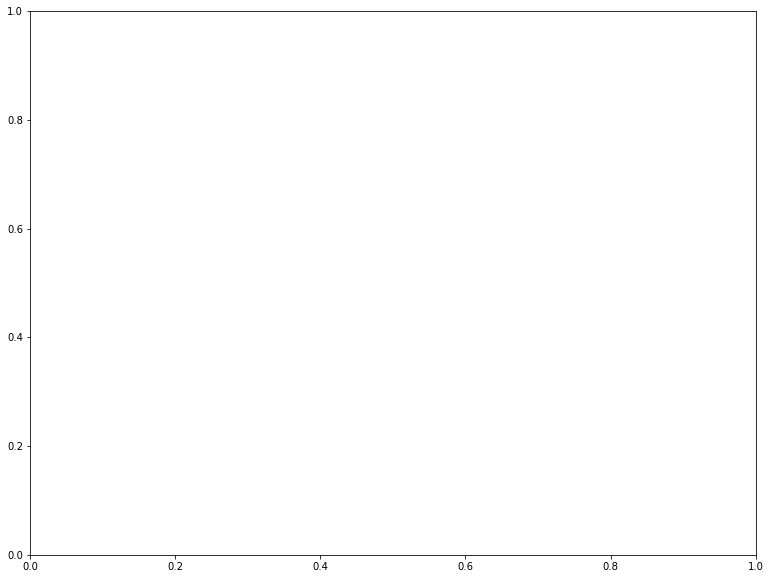

In [33]:
# Create a figure
fig, ax = plt.subplots(figsize=(13, 10))


plt.bar(Pbins[:-1],
        pass_fraction_condition_3_Pbins,
        width=np.diff(Pbins),
        color=my_colours[0], 
        alpha=alpha, 
        edgecolor='black',
        align="edge")

# Axes labels 
plt.xlabel('Orbital Period [years]', fontsize=axis_label_font)
plt.ylabel('Condition 3 Pass Fraction', fontsize=axis_label_font)

# Set x-axis to log scale
plt.xscale('log')

# Formatting axes labels to avoid scientific notation
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# Set x-axis tick parameters
plt.tick_params(labelsize=axis_numbers_font, which='major', length=7)
plt.tick_params(which='minor', length=4)


NameError: name 'pass_fraction_condition_4_Pbins' is not defined

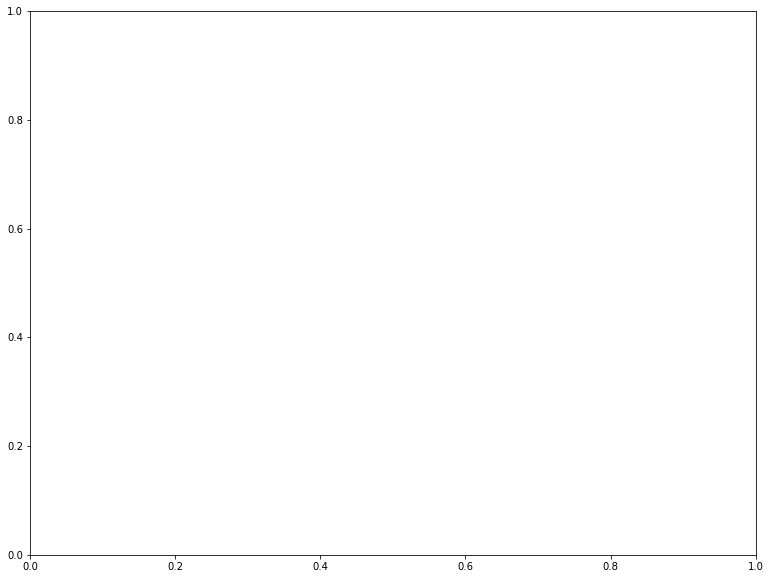

In [34]:
# Create a figure
fig, ax = plt.subplots(figsize=(13, 10))


plt.bar(Pbins[:-1],
        pass_fraction_condition_4_Pbins,
        width=np.diff(Pbins),
        color=my_colours[0], 
        alpha=alpha, 
        edgecolor='black',
        align="edge")

# Axes labels 
plt.xlabel('Orbital Period [years]', fontsize=axis_label_font)
plt.ylabel('Condition 4 Pass Fraction', fontsize=axis_label_font)

# Set x-axis to log scale
plt.xscale('log')

# Formatting axes labels to avoid scientific notation
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# Set x-axis tick parameters
plt.tick_params(labelsize=axis_numbers_font, which='major', length=7)
plt.tick_params(which='minor', length=4)


# w.r.t mass

In [35]:
# Making arrays we will fill in the for loop 
num_planets_per_M_bin        = np.zeros(num_Mbins)
num_detected_Mbin          = np.zeros(num_Mbins)
sensitivity_Mbins           = np.zeros(num_Mbins)
detection_uncertainty_Mbins = np.zeros(num_Mbins)

num_condition_1_Mbins = np.zeros(num_Mbins)
num_condition_2_Mbins = np.zeros(num_Mbins)
num_condition_3_Mbins = np.zeros(num_Mbins)
num_condition_4_Mbins = np.zeros(num_Mbins)

In [47]:
# Iterate through each Meriod bin
for i, M in enumerate(Mbins[:-1]):
        
    # Mask to determine if data falls within the current Meriod-mass bin
    mask = (inj_mass_data >= Mbins[i]) & (inj_mass_data < Mbins[i+1])

    # Determine the number of detected Mlanets in the current bin
    detected = mask & (df['Detection'] == 1)
    condition_1 = mask & (df['Condition 1'] == 1)
    condition_2 = mask & (df['Condition 2'] == 1)
    condition_3 = mask & (df['Condition 3'] == 1)
    condition_4 = mask & (df['Condition 4'] == 1)

    # Find the number of Mlanets/data Moints in the current bin
    num_planets_per_M_bin[i] = mask.sum()

    # Find the number of detected Mlanets in the current bin
    num_detected_Mbin[i] = detected.sum()
    num_condition_1_Mbins[i] = condition_1.sum()
    num_condition_2_Mbins[i] = condition_2.sum()
    num_condition_3_Mbins[i] = condition_3.sum()
    num_condition_4_Mbins[i] = condition_4.sum()

        
sensitivity_Mbins = num_detected_Mbin/ num_planets_per_M_bin  
detection_uncertainty_Mbins = np.sqrt(num_detected_Mbin) / num_planets_per_M_bin  
Mass_fraction_condition_1_Mbins = num_condition_1_Mbins/ num_planets_per_M_bin  
Mass_fraction_condition_2_Mbins = num_condition_2_Mbins/ num_planets_per_M_bin  
Mass_fraction_condition_3_Mbins = num_condition_3_Mbins/ num_planets_per_M_bin  
Mass_fraction_condition_4_Mbins = num_condition_4_Mbins/ num_planets_per_M_bin  

In [55]:
print(len(Mbins[:-1]))
print(len(sensitivity_Mbins))

19
19


In [56]:
np.diff(Mbins)

array([0.06582197, 0.08026374, 0.09787414, 0.11934837, 0.14553418,
       0.17746534, 0.2164024 , 0.26388251, 0.32178007, 0.39238073,
       0.47847164, 0.58345146, 0.71146455, 0.86756455, 1.05791391,
       1.29002718, 1.57306762, 1.91820899, 2.33907665])

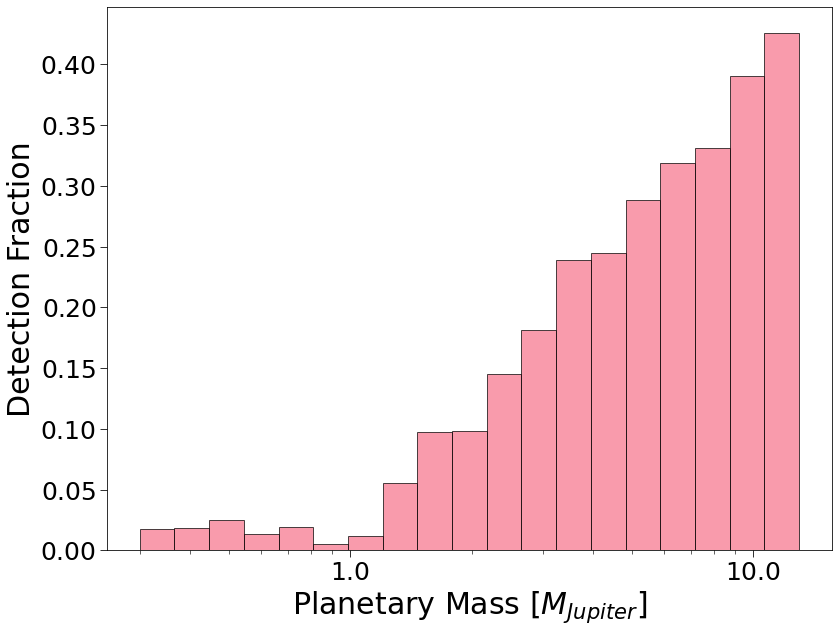

In [53]:
# Create a figure
fig, ax = plt.subplots(figsize=(13, 10))


plt.bar(Mbins[:-1],
        sensitivity_Mbins,
        width=np.diff(Mbins),
        color=my_colours[0], 
        alpha=alpha, 
        edgecolor='black',
        align="edge")

# Axes labels 
plt.xlabel('Planetary Mass [$M_{Jupiter}$]', fontsize=axis_label_font)
plt.ylabel('Detection Fraction', fontsize=axis_label_font)

# Set x-axis to log scale
plt.xscale('log')

# Formatting axes labels to avoid scientific notation
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# Set x-axis tick parameters
plt.tick_params(labelsize=axis_numbers_font, which='major', length=7)
plt.tick_params(which='minor', length=4)

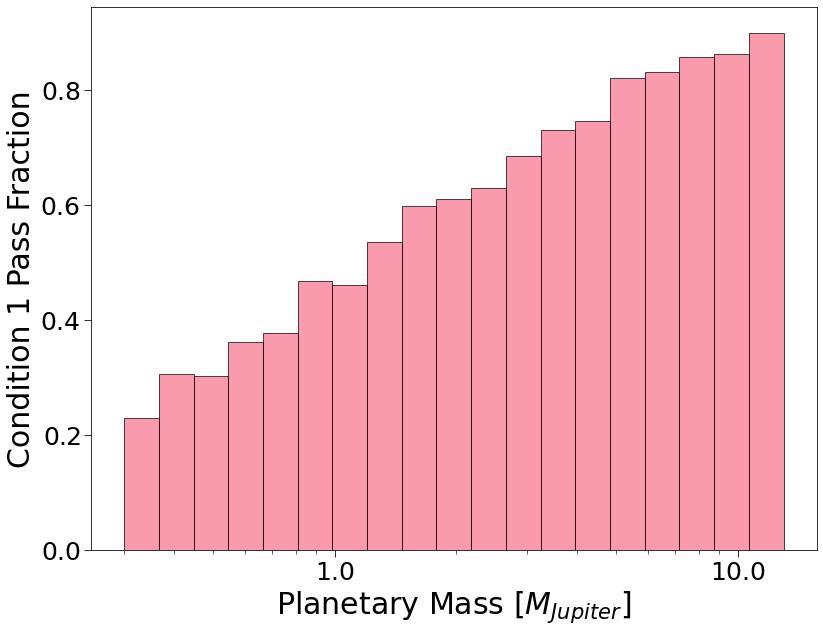

In [39]:
# Create a figure
fig, ax = plt.subplots(figsize=(13, 10))


plt.bar(Mbins[:-1],
        Mass_fraction_condition_1_Mbins,
        width=np.diff(Mbins),
        color=my_colours[0], 
        alpha=alpha, 
        edgecolor='black',
        align="edge")

# Axes labels 
plt.xlabel('Planetary Mass [$M_{Jupiter}$]', fontsize=axis_label_font)
plt.ylabel('Condition 1 Pass Fraction', fontsize=axis_label_font)

# Set x-axis to log scale
plt.xscale('log')

# Formatting axes labels to avoid scientific notation
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# Set x-axis tick parameters
plt.tick_params(labelsize=axis_numbers_font, which='major', length=7)
plt.tick_params(which='minor', length=4)


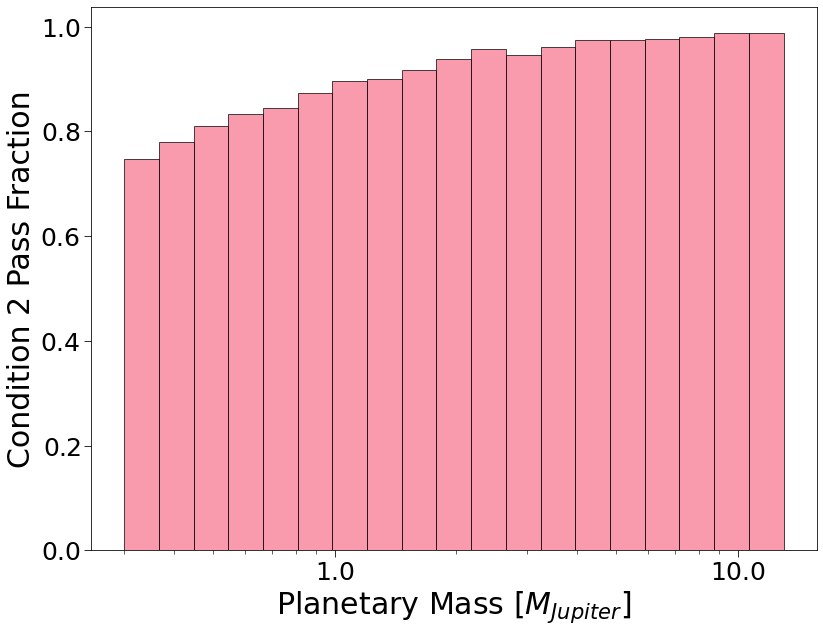

In [40]:
# Create a figure
fig, ax = plt.subplots(figsize=(13, 10))


plt.bar(Mbins[:-1],
        Mass_fraction_condition_2_Mbins,
        width=np.diff(Mbins),
        color=my_colours[0], 
        alpha=alpha, 
        edgecolor='black',
        align="edge")

# Axes labels 
plt.xlabel('Planetary Mass [$M_{Jupiter}$]', fontsize=axis_label_font)
plt.ylabel('Condition 2 Pass Fraction', fontsize=axis_label_font)

# Set x-axis to log scale
plt.xscale('log')

# Formatting axes labels to avoid scientific notation
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# Set x-axis tick parameters
plt.tick_params(labelsize=axis_numbers_font, which='major', length=7)
plt.tick_params(which='minor', length=4)


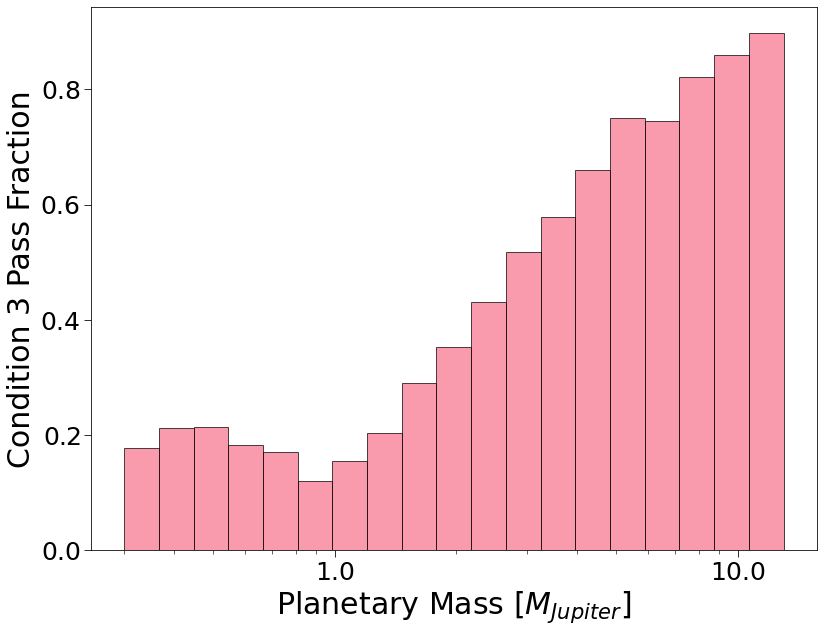

In [41]:
# Create a figure
fig, ax = plt.subplots(figsize=(13, 10))


plt.bar(Mbins[:-1],
        Mass_fraction_condition_3_Mbins,
        width=np.diff(Mbins),
        color=my_colours[0], 
        alpha=alpha, 
        edgecolor='black',
        align="edge")

# Axes labels 
plt.xlabel('Planetary Mass [$M_{Jupiter}$]', fontsize=axis_label_font)
plt.ylabel('Condition 3 Pass Fraction', fontsize=axis_label_font)

# Set x-axis to log scale
plt.xscale('log')

# Formatting axes labels to avoid scientific notation
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# Set x-axis tick parameters
plt.tick_params(labelsize=axis_numbers_font, which='major', length=7)
plt.tick_params(which='minor', length=4)


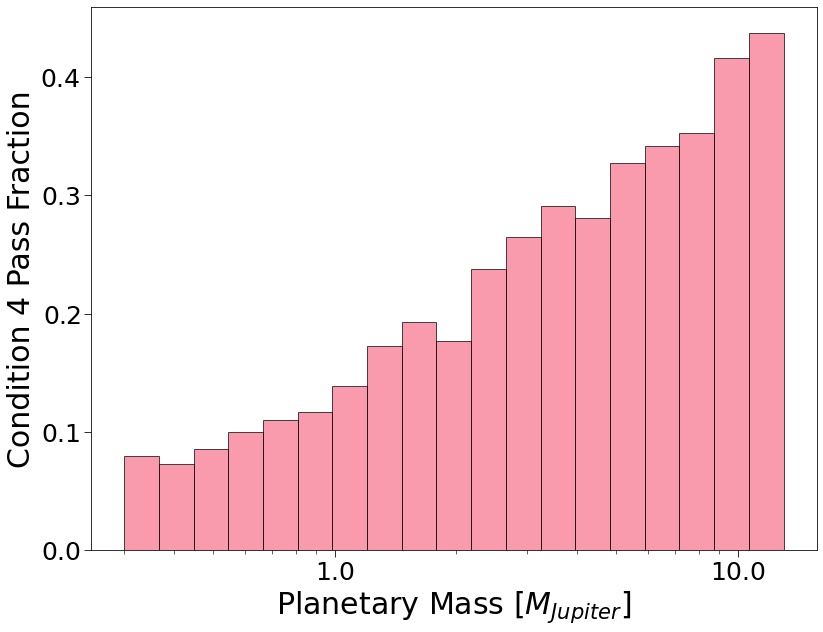

In [42]:
# Create a figure
fig, ax = plt.subplots(figsize=(13, 10))


plt.bar(Mbins[:-1],
        Mass_fraction_condition_4_Mbins,
        width=np.diff(Mbins),
        color=my_colours[0], 
        alpha=alpha, 
        edgecolor='black',
        align="edge")

# Axes labels 
plt.xlabel('Planetary Mass [$M_{Jupiter}$]', fontsize=axis_label_font)
plt.ylabel('Condition 4 Pass Fraction', fontsize=axis_label_font)

# Set x-axis to log scale
plt.xscale('log')

# Formatting axes labels to avoid scientific notation
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# Set x-axis tick parameters
plt.tick_params(labelsize=axis_numbers_font, which='major', length=7)
plt.tick_params(which='minor', length=4)
